## M5 Forecasting - Accuracy 



<h1> Business/Real-world Problem</h1>

<h2> What is Sales Forecasting?</h2>

<p>
Sales forecasting is the process of estimating future revenue by predicting the amount of product or services a sales unit (which can be an individual salesperson, a sales team, or a company) will sell in the next week, month, quarter, or year.
</p>

<h2> Problem Statement</h2>

<p>
Forecating sales is essential for the companies for example, investing new methodoligies to increase their revenue for their products which may account for low sales in the future through promotions/discounts etc.. Hence for the established businesses it becomes important to <b> forecast the future sales accurately.<b>
</p>

<h2> Source </h2>


<p>
The Makridakis Open Forecasting Center (MOFC) at the University of Nicosia conducts cutting-edge forecasting research. The MOFC is well known for its Makridakis Competitions, the first of which ran in the 1980s.
The (M5 Forecasting) is the fifth iteration, in which we use hierarchical sales data from Walmart, the world’s largest company by revenue, to forecast daily sales for the next 28 days. The data, covers stores in three US States (California, Texas, and Wisconsin) and includes item level, department, product categories, and store details. In addition, it has explanatory variables such as price, promotions, day of the week, and special events. Together, this robust dataset will be used to improve forecasting accuracy.</p>
<p>
<b> Source - </b> https://www.kaggle.com/c/m5-forecasting-accuracy </p>


<h2>  Business objectives and constraints. </h2>

*   High Interpretability as we need to know what are the
important factors contributed in forecasting accurately.

*   No strict low latency as we need to forecast sales
on a daily basis as compared to minute or hourly basis.



<h1> Machine Learning Problem </h1> 

<h3>  Data Overview </h3>

<h4>The M5 dataset constists of 3 files </h4>
<b>Source- </b> https://www.kaggle.com/c/m5-forecasting-accuracy/data

1.   Calender.csv - Contains information about the dates the products are sold.
    *   date: The date in a “y-m-d” format.
    *   wm_yr_wk: The id of the week the date belongs to.
    *   weekday: The type of the day (Saturday, Sunday, …, Friday).
    *   wday: The id of the weekday, starting from Saturday.
    *   month: The month of the date.
    *   year: The year of the date.
    *   event_name_1: If the date includes an event, the name of this event.
    *   event_type_1: If the date includes an event, the type of this event.
    *   event_name_2: If the date includes a second event, the name of this event.
    *   event_type_2: If the date includes a second event, the type of this event.
    *   snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.
  
  
  
  
2.  sell_prices.csv - Contains information about the price of the products sold per store and date.

    *   store_id: The id of the store where the product is sold
    *   item_id: The id of the product.
    *   wm_yr_wk: The id of the week.
    *   sell_price: The price of the product for the given week/store. The price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week. Note that although prices are constant at weekly basis, they may change through time (both training and test set).  




3.   sales_train_validation.csv - Contains the historical daily unit sales data per product and store.

    *   item_id: The id of the product.
    *   dept_id: The id of the department the product belongs to.
    *   cat_id: The id of the category the product belongs to.
    *   store_id: The id of the store where the product is sold.
    *   state_id: The State where the store is located.
    *   d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29. 

<h2>  Mapping the real-world problem to an ML problem </h2>

<h3> Type of Machine Learning Problem </h3>

<p>
The problem we are solving is a time series problem which we can transform it into supervised learning problem by performing Feature engineering on the raw time series data. Then we can use these features as input variables and 'sales of the item' as output variable (Real number) and solve the problem of forecating using Machine learning Regression models.     
</p>

<h3>  Performance Metric</h3>

* RMSE 
    
* R-Square Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mat_dates
from matplotlib.ticker import FuncFormatter, PercentFormatter
import math
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
#Reading the data from files


df_calendar = pd.read_csv('calendar.csv')
df_sales = pd.read_csv('sales_train_validation.csv')
df_prices = pd.read_csv('sell_prices.csv')

# Basic analysis part



In [3]:
df_calendar.shape

(1969, 14)

In [4]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
from collections import Counter

Counter(df_calendar.dtypes)

Counter({dtype('O'): 7, dtype('int64'): 7})

In [6]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [3]:
## This function will reduce the occupied memory usuage

def memory_reduce(df):
    
    #Taking all the column for the dataframe one by one
    for col in df:
        
        #Compairing the datatype of the column
        if df[col].dtype == "float64":
            
            #using downcasting loop to the reduce the size of the datatype of the columns to reduce the occupied memory usuage
            df[col]=pd.to_numeric(df[col], downcast="float")
        
        if df[col].dtype == "int64":
            
            df[col]=pd.to_numeric(df[col], downcast="integer")
            
    
    return df

In [4]:
df_calendar=memory_reduce(df_calendar)

df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int16 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int8  
 4   month         1969 non-null   int8  
 5   year          1969 non-null   int16 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int8  
 12  snap_TX       1969 non-null   int8  
 13  snap_WI       1969 non-null   int8  
dtypes: int16(2), int8(5), object(7)
memory usage: 125.1+ KB


In [9]:
""" checking null values present in this train dataset or not """

df_calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [10]:
df_calendar.to_csv("cleaned_calendar.csv", index=False)

In [10]:
df_sales.shape

(30490, 1919)

In [11]:
df_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [12]:
Counter(df_sales.dtypes)

Counter({dtype('O'): 6, dtype('int64'): 1913})

In [13]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [5]:
df_sales=memory_reduce(df_sales)

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int16(1288), int8(625), object(6)
memory usage: 94.5+ MB


In [15]:
""" checking null values present in this train dataset or not """

df_sales.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [17]:
df_sales.to_csv("cleaned_sales.csv", index=False)

In [16]:
df_prices.shape

(6841121, 4)

In [17]:
df_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [18]:
Counter(df_prices.dtypes)

Counter({dtype('O'): 2, dtype('int64'): 1, dtype('float64'): 1})

In [19]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [6]:
df_prices=memory_reduce(df_prices)

df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int16  
 3   sell_price  float32
dtypes: float32(1), int16(1), object(2)
memory usage: 143.5+ MB


In [21]:
""" checking null values present in this train dataset or not """

df_prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [24]:
df_prices.to_csv("cleaned_prices.csv", index=False)

<h1> 3. Exploratory Data Analysis </h1>

### item counts in each store and category

In [22]:
item_counts = df_sales.groupby(['store_id', 'cat_id']).agg({'item_id':'nunique'}).reset_index()
item_counts.columns = ['store_id', 'cat_id', 'item_counts']

Text(0.5, 1.0, ' Comparisim of Count of items among different catagories vs across all states and stores ')

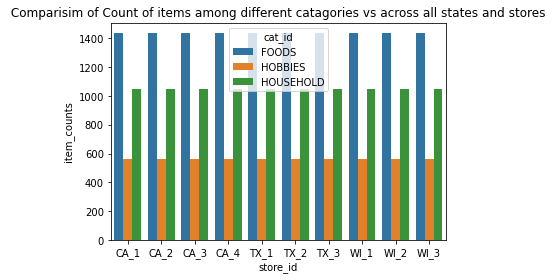

In [23]:
sns.barplot(data=item_counts, x='store_id', y='item_counts', hue='cat_id');
plt.title(" Comparisim of Count of items among different catagories vs across all states and stores ")

Text(0.5, 1.0, ' Comparisim of Count of items vs different catagories ')

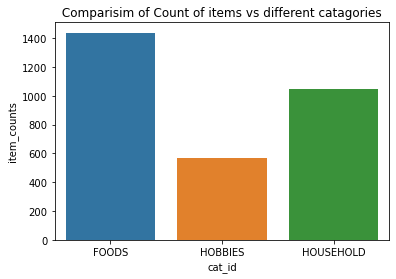

In [24]:
sns.barplot(data=item_counts, x='cat_id', y='item_counts');
plt.title(" Comparisim of Count of items vs different catagories ")

### Plot the sales over time

#### Daily Total Sales across all states and stores

In [25]:
total_sales = df_sales.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
total_sales.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)

total_sales = total_sales.merge(df_calendar,on='d',how='left')
total_sales = total_sales[['date','Total_Sales']]
total_sales['date'] = pd.to_datetime(total_sales['date'])

daily_dates = total_sales['date']
daily_totalSales = total_sales['Total_Sales']


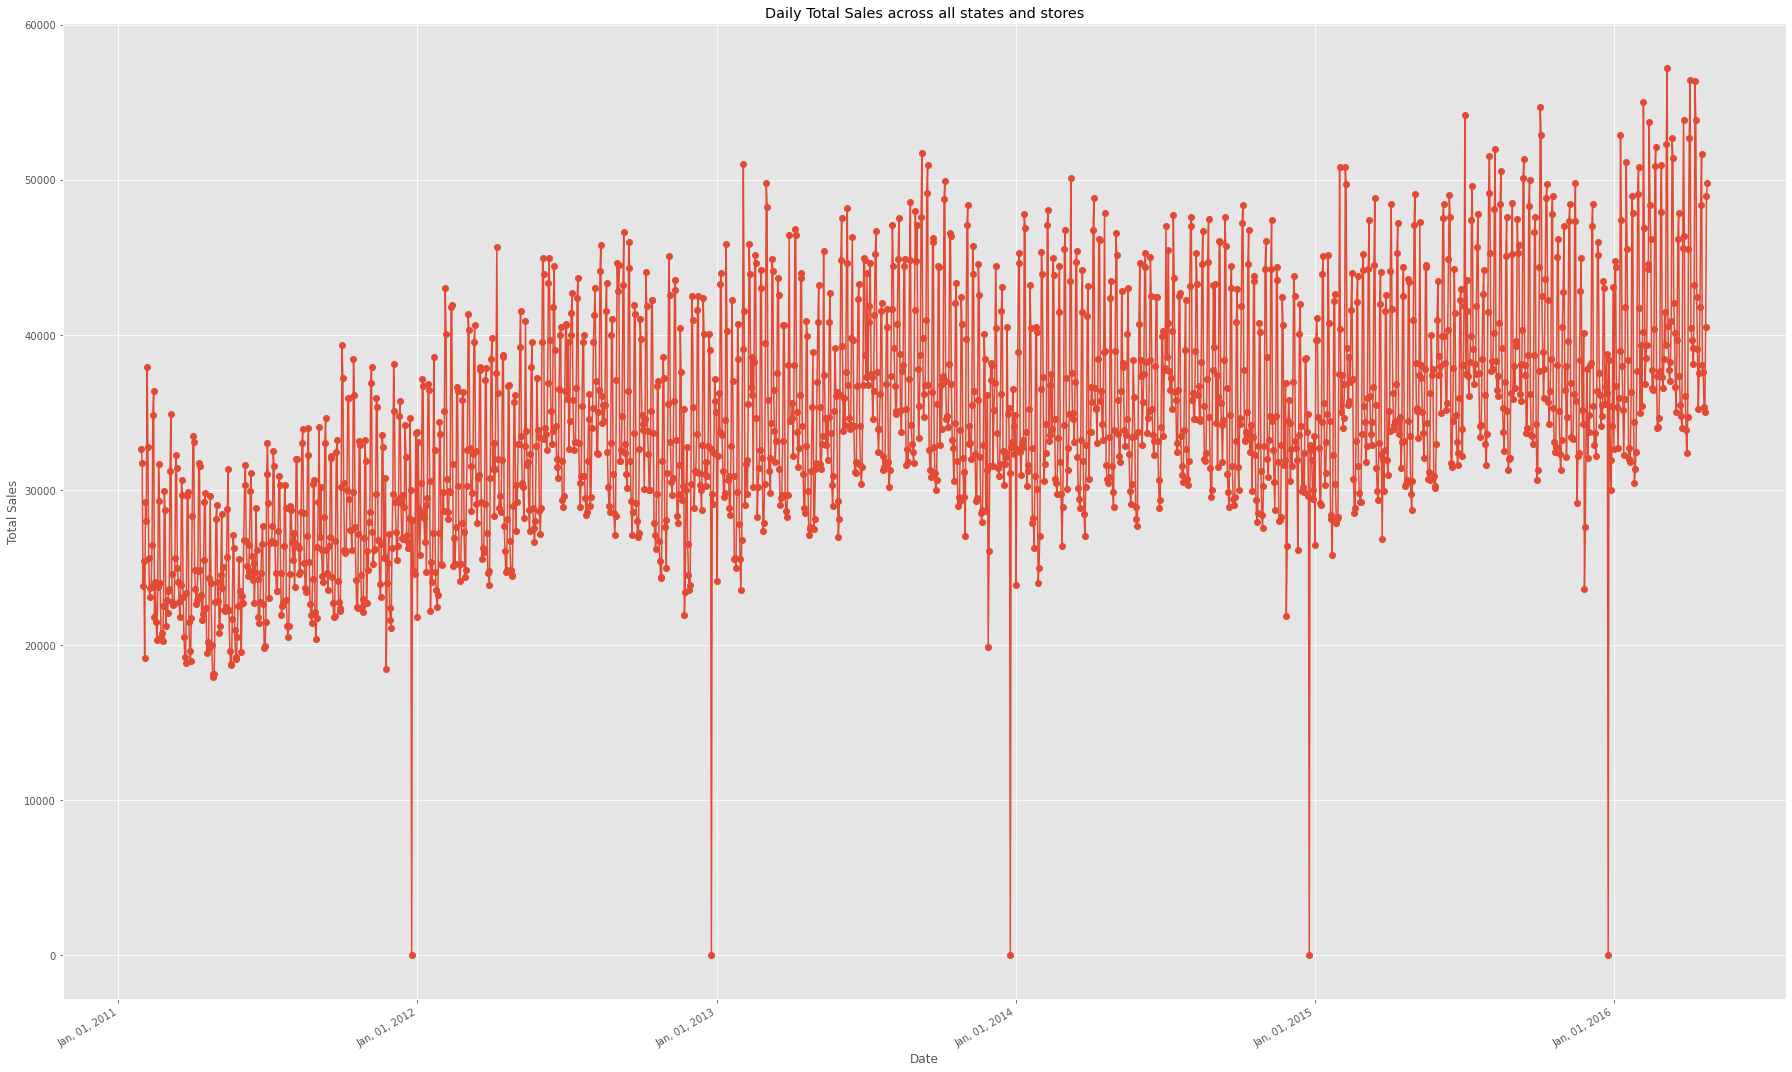

In [26]:
plt.style.use('ggplot')
plt.plot_date(daily_dates,daily_totalSales,linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mat_dates.DateFormatter('%b, %d, %Y')

plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().set_size_inches(25, 15)
plt.title('Daily Total Sales across all states and stores')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   There is a slight upward trend in total sales from 2011 to 2016 

2.   The sales pattern is same in each year and on 1st Jan of every year we observe zero sales (may be the stores are closed on New year Eve)



####  Overall sales for each year from 2011-2016

In [29]:

total_sales['year'] = total_sales['date'].dt.year
total_sales_grp = total_sales.groupby(['year'])

gv = total_sales_grp.groups


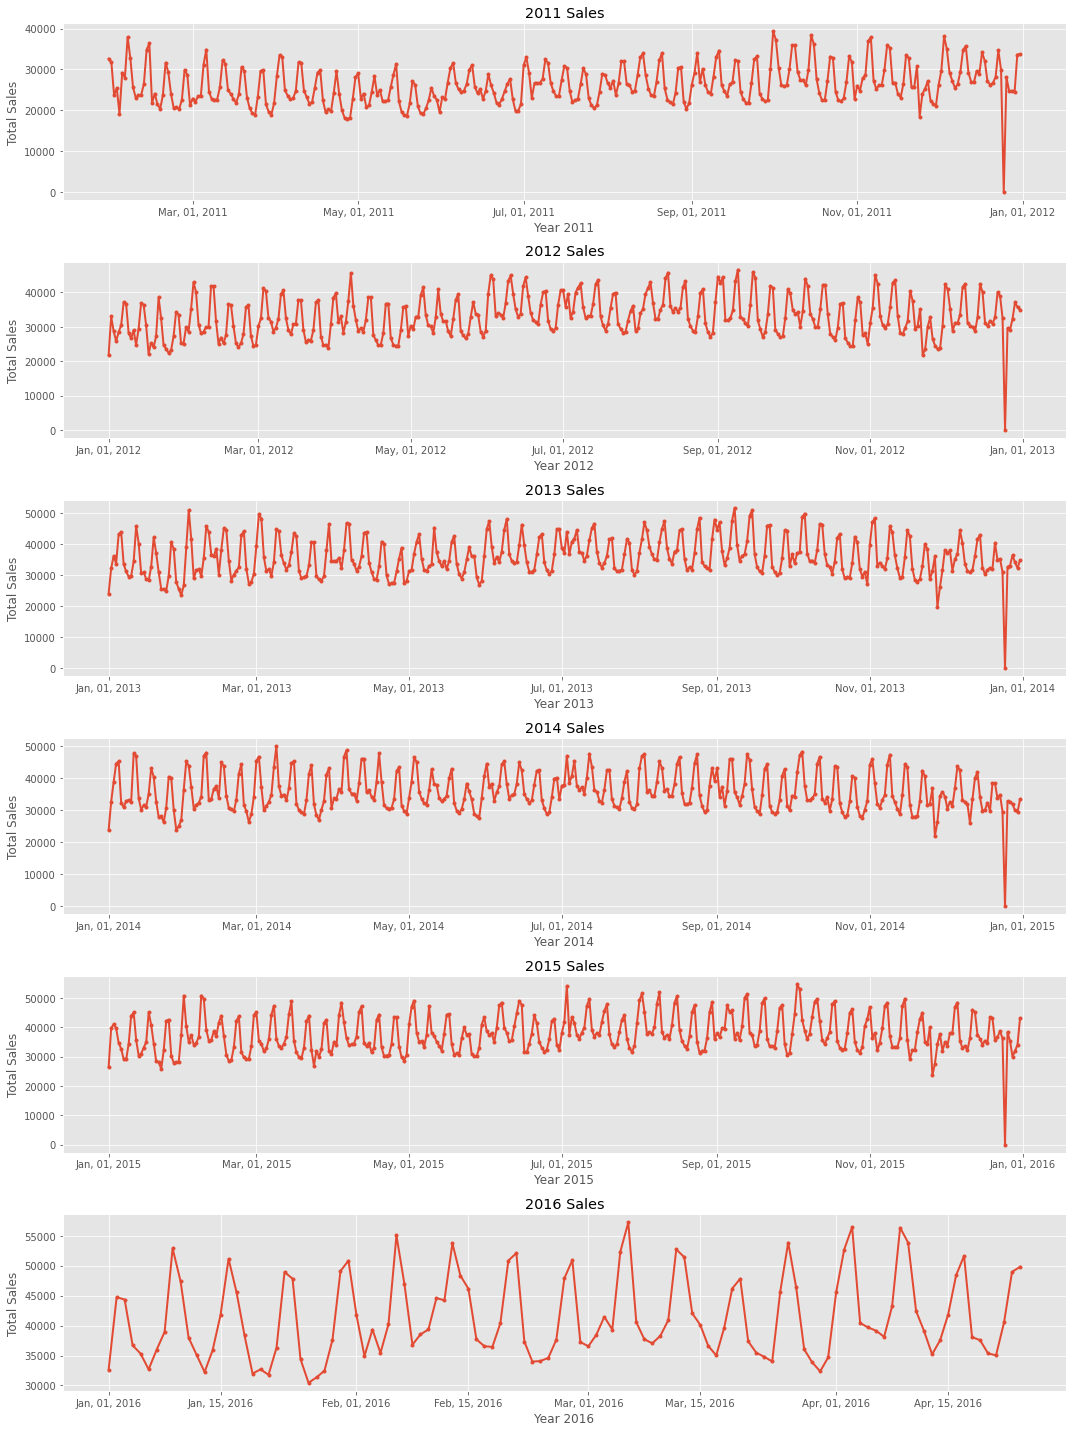

In [30]:

gv_val_lst = list(gv.values())
date_format = mat_dates.DateFormatter('%b, %d, %Y')
fig = plt.figure(figsize=(15, 20))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    plt.plot_date(total_sales.iloc[gv_val_lst[i]]['date'],total_sales.iloc[gv_val_lst[i]]['Total_Sales'],linestyle='solid',linewidth=2,marker='.')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().set_title(str(2011+i)+ ' Sales')
    plt.gca().set_xlabel('Year '+str(2011+i))
    plt.gca().set_ylabel('Total Sales')
plt.tight_layout()
plt.show()


<h4>Observations</h4>

1.   There is similar pattern of overall sales across years and has yearly seasonality

2.   From 2012 to 2015 sales we observe each 2 month sales having same pattern and also each year time-series of 2012-2015 is stationary time-series. 



#### Global monthly seasonality sales

In [33]:
total_sales['month']=total_sales['date'].dt.month_name()
total_sales_gpm = total_sales.groupby('month').agg({'Total_Sales':'sum'}).reset_index()

#reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index

months = list(total_sales['date'].dt.month_name().unique())
total_sales_gpm.index = pd.CategoricalIndex(total_sales_gpm.month, categories=months, ordered=True)
total_sales_gpm = total_sales_gpm.sort_index()
total_sales_gpm.reset_index(drop=True,inplace=True)


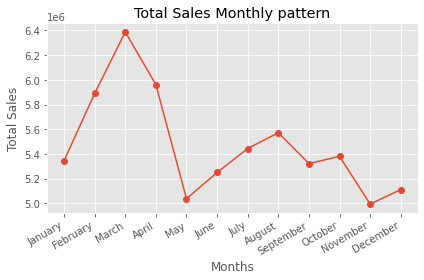

In [34]:
plt.plot_date(total_sales_gpm['month'],total_sales_gpm['Total_Sales'],linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Total Sales Monthly pattern')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


<h4>Observations</h4>

1.   Sales are high in the month of March and low in the month of November
2.   Sales hit low in the middle of year and picks up and again hit low at end of year



#### Global weekly seasonality sales

In [35]:
total_sales['day_name']=total_sales['date'].dt.day_name()
total_sales_gpwkly = total_sales.groupby('day_name').agg({'Total_Sales':'sum'}).reset_index()

#reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index

days = list(total_sales['date'].dt.day_name().unique())
total_sales_gpwkly.index = pd.CategoricalIndex(total_sales_gpwkly.day_name, categories=days, ordered=True)
total_sales_gpwkly = total_sales_gpwkly.sort_index()
total_sales_gpwkly.reset_index(drop=True,inplace=True)


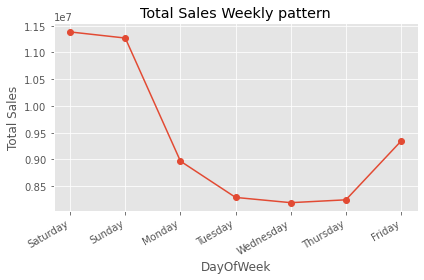

In [36]:
plt.plot_date(total_sales_gpwkly['day_name'],total_sales_gpwkly['Total_Sales'],linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Total Sales Weekly pattern')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



<h4>Observations</h4>

1.   Sales are high on Weekends and decrease over the course of working days and again there is rise in sales on early weekends(Friday's)
2.   We observe people tend to shop on weekends more compared to weekdays
3.   Sunday overall sales are less than Saturday's.






#### Sales Proportion from each state

In [37]:
sales_in_state_grp = df_sales.groupby('state_id')
sales_in_state_grp_idx = list(sales_in_state_grp.groups.values())

CA_sales_df = df_sales.iloc[sales_in_state_grp_idx[0]]
CA_total_sales = int(CA_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

TX_sales_df = df_sales.iloc[sales_in_state_grp_idx[1]]
TX_total_sales = int(TX_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

WI_sales_df = df_sales.iloc[sales_in_state_grp_idx[2]]
WI_total_sales = int(WI_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


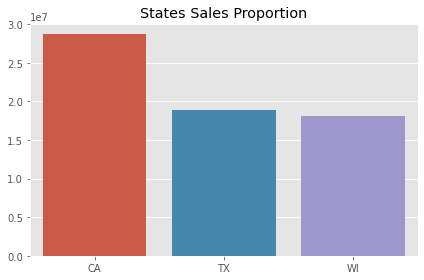

In [38]:
states_overallSales = [CA_total_sales,TX_total_sales,WI_total_sales]
states = ['CA','TX','WI']

sns.barplot(states,states_overallSales)

plt.title('States Sales Proportion')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Out of three states California accounts for high percentage of the total sales.
2.   Texas and Wisconsin total sales are almost equal.



#### Stores Sales proportion

In [46]:
sales_in_store_grp = df_sales.groupby('store_id')
sales_in_store_grp_idx = list(sales_in_store_grp.groups.values())

stores_key = list(sales_in_store_grp.groups.keys())
stores = []

sales_in_store = []
for i in range(len(stores_key)):
    stores.append(stores_key[i])
    df_store = df_sales.iloc[sales_in_store_grp_idx[i]]
    sales_in_store.append(int(df_store.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))


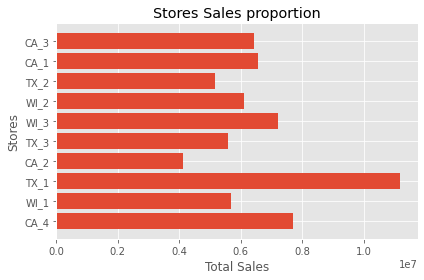

In [47]:
stores = list(np.asarray(stores)[np.argsort(np.asarray(sales_in_store))])
sales_in_store = list(np.asarray(sales_in_store)[np.argsort(np.asarray(sales_in_store))])

plt.barh(stores,store_sales)
plt.title('Stores Sales proportion')
plt.xlabel('Total Sales')
plt.ylabel('Stores')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Even though California State accounts for 43.6% of total sales, intersetingly 2 of its stores total sales are in bottom 4  
2.   CA_3 Store has highest sales and CA_4 store has lowest sales



#### Product Category Sales Proportion

In [49]:

prod_cat_in_sales = df_sales.groupby('cat_id')
prod_cat_in_sales_idx = list(prod_cat_in_sales.groups.values())

cat_key = list(prod_cat_in_sales.groups.keys())
prod_cats = []
prod_cats_sales = []

for i in range(len(cat_key)):
    prod_cats.append(cat_key[i])
    df_cat = df_sales.iloc[prod_cat_in_sales_idx[i]]
    prod_cats_sales.append(int(df_cat.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))


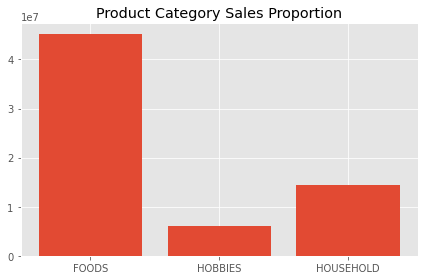

In [50]:
plt.bar(prod_cats,prod_cats_sales)

plt.title('Product Category Sales Proportion')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Food category has highest sales proportion and Hobbies category is the lowest.
2.   It can be concluded that people shop more on household needs than their hobbies and food products are essential and so the sales are also high.



#### Department Sales proportion

In [52]:
dept_wise_sales_grp = df_sales.groupby('dept_id')
dept_wise_sales_grp_idx = list(dept_wise_sales_grp.groups.values())

dept_key = list(dept_wise_sales_grp.groups.keys())
depts = []
dept_sales = []

for i in range(len(dept_key)):
    depts.append(dept_key[i])
    df_dept = df_sales.iloc[dept_wise_sales_grp_idx[i]]
    dept_sales.append(int(df_dept.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))



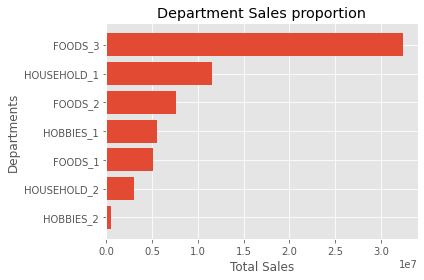

In [53]:
depts = list(np.asarray(depts)[np.argsort(np.asarray(dept_sales))])
dept_sales = list(np.asarray(dept_sales)[np.argsort(np.asarray(dept_sales))])
plt.barh(depts,dept_sales)
plt.title('Department Sales proportion')
plt.xlabel('Total Sales')
plt.ylabel('Departments')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Highest sales are from 'FOODS_3' department and lowest are from 'HOBBIES_2' department. 'FOOD_3' department alone has 50% sales proportion and other 6 departments accounts for rest 50% sales.
2.   Even though the total sales from 'HOBBIES' category is very less(9.3%), interestingly it's department 'HOBBIES_1' has high number of sales compared to FOODS category's 'FOODS_1' department.



#### Product Category sales proportion for each States

In [54]:
statewise_prod_cat_grp = df_sales.groupby(['state_id','cat_id'])
statewise_prod_cat_grp_idx = list(statewise_prod_cat_grp.groups.values())
state_cat_key = list(statewise_prod_cat_grp.groups.keys())
states_name = []

food_sales = []
hobbies_sales = []
household_sales = []

for i in range(len(state_cat_key)):
    if state_cat_key[i][0] not in states_name:
        states_name.append(state_cat_key[i][0])
    state_cat_df = df_sales.iloc[statewise_prod_cat_grp_idx[i]]
    if i%3 == 0:
        food_sales.append(int(state_cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))
    elif i%3 == 1:
        hobbies_sales.append(int(state_cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))
    else:
        household_sales.append(int(state_cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))



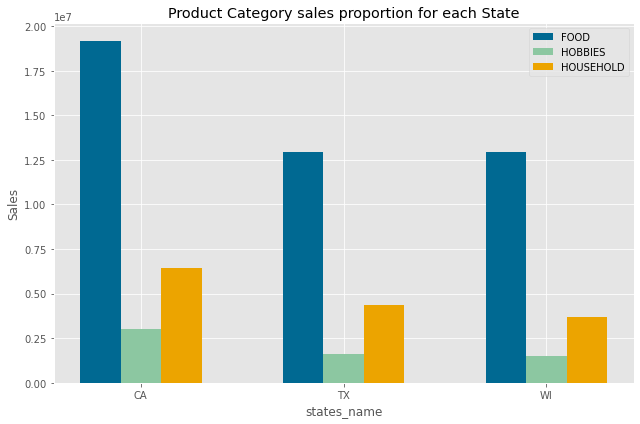

In [55]:
x_idx = np.arange(len(states_name))
width = 0.2
plt.figure(figsize=(9,6))
plt.bar(x_idx - width, food_sales,  width = width, color="#006992", label="FOOD")
plt.bar(x_idx, hobbies_sales, width = width, color="#8cc7a1", label="HOBBIES")
plt.bar(x_idx + width, household_sales,  width = width, color="#ECA400", label="HOUSEHOLD")

plt.legend()
plt.xticks(ticks=x_idx, labels=states_name)
plt.title("Product Category sales proportion for each State")
plt.xlabel("states_name")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

<h4> Observations </h4>

1.   All the three states has similar proportion of sales for all the three product categories.
2. Food category sales proportion is same for the states Texas and Wisconsin

#### Number of days with events and with no events 

In [58]:
"""Here we get number of days with and without events and plot the distribution"""

calender = df_calendar[['event_name_1']]
no_event_per = ((len(calender) - int(calender.count()))/len(calender))*100

event_per = (int(calender.count())/len(calender))*100
event_lst = [('No Events',no_event_per),('Events',event_per)]

events = [x[0] for x in event_lst]
events_count = [x[1] for x in event_lst]


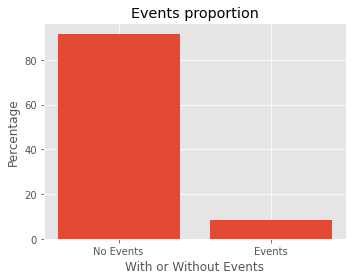

In [59]:
plt.figure(figsize=(5,4))
plt.bar(events,events_count)

plt.title('Events proportion')
plt.xlabel('With or Without Events')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Majority of the days more than 90% are non-event days
2.   Only 10% of the days are event days.



#### Events types proportion

In [61]:
event_type_1 = [tuple(x) for x in df_calendar[['event_type_1']].value_counts().reset_index().values]
events_name = [x[0] for x in event_type_1]
events_name.reverse()
events_count = [x[1] for x in event_type_1]
events_count.reverse()


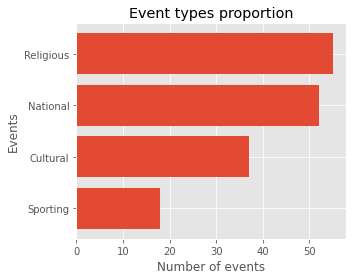

In [62]:
plt.figure(figsize=(5,4))
plt.barh(events_name,events_count)

plt.title('Event types proportion')
plt.xlabel('Number of events')
plt.ylabel('Events')

plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   There are high religious events and less sporting events.
2.   National and Religious eventa are almost equal.




<h3>Items proportion of each category</h3>

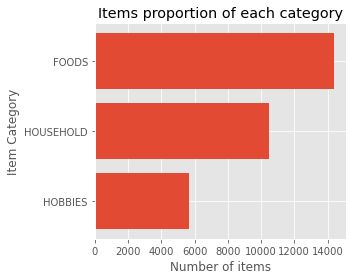

In [23]:
cat_items = [tuple(x) for x in df_sales['cat_id'].value_counts().reset_index().values]
cat_items_cat = [x[0] for x in cat_items]
cat_items_cat.reverse()

cat_item_count = [x[1] for x in cat_items]
cat_item_count.reverse()

plt.figure(figsize=(5,4))
plt.barh(cat_items_cat,cat_item_count)
plt.title('Items proportion of each category')
plt.xlabel('Number of items')
plt.ylabel('Item Category')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   There are more number of items from Food category and less number of items from Hobbies category.
2.   This may be one of the reason for high number of sales from Food category and less from Hobbies category.



<h3>Sales Vs year and product category</h3>

In [24]:
"""Here we get sales proportion of each product category for each year """
sales_cat = {}
sales_cat_grp = df_sales.groupby('cat_id')
sales_cat_grp_idx = list(sales_cat_grp.groups.values())
cat_key = list(sales_cat_grp.groups.keys())

for i in range(len(cat_key)):
    sales_cat_df = pd.melt(df_sales.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913'],var_name='d',value_name='sales').merge(df_calendar,on='d',how='left')
    sales_cat_yr_grp = sales_cat_df.groupby('year').groups
    sales_cat_yr_idx = list(sales_cat_yr_grp.values())
    sales_cat_yr_key = list(sales_cat_yr_grp.keys())
    sales_cat[cat_key[i]] = {}

    for j in range(len(sales_cat_yr_key)):
        sales_cat[cat_key[i]][sales_cat_yr_key[j]] = sales_cat_df.iloc[sales_cat_yr_idx[j]]['sales'].sum()


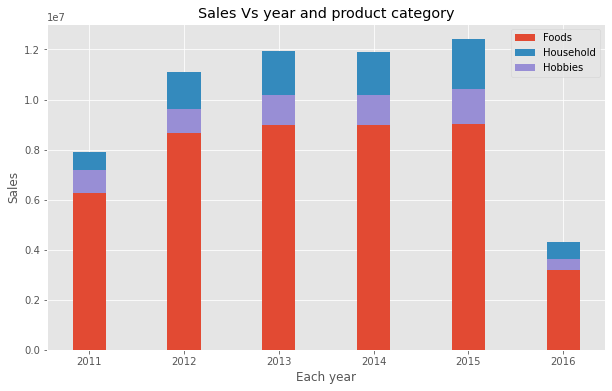

In [25]:
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html
N = 6
FOODS_sales = list(sales_cat['FOODS'].values())
HOBBIES_sales = list(sales_cat['HOBBIES'].values())
HOUSEHOLD_sales = list(sales_cat['HOUSEHOLD'].values())

ind = np.arange(N)    
width = 0.35   


plt.figure(figsize=(10,6))
p1 = plt.bar(ind, FOODS_sales, width)
p2 = plt.bar(ind, HOUSEHOLD_sales, width,bottom=FOODS_sales)
p3 = plt.bar(ind, HOBBIES_sales, width,bottom=FOODS_sales)

plt.xlabel('Each year')
plt.ylabel('Sales')
plt.title('Sales Vs year and product category')
plt.xticks(ind, (2011, 2012, 2013, 2014, 2015, 2016))
plt.legend((p1[0], p2[0], p3[0]), ('Foods', 'Household','Hobbies'))

plt.show()

<h4>Observations</h4>

1.   2015 has the highest number of sales and 2016 the lowest number of sales(only 4 months of sales provided). 
2.   Of the 3 categories, food category sales are higher in all the years. Food, Household and Hobbies sales are same in the years 2013 and 2014. 
3.   There is not a much difference is sales of Food category in the years from 2012-2015.








#### Daily total sales per item category

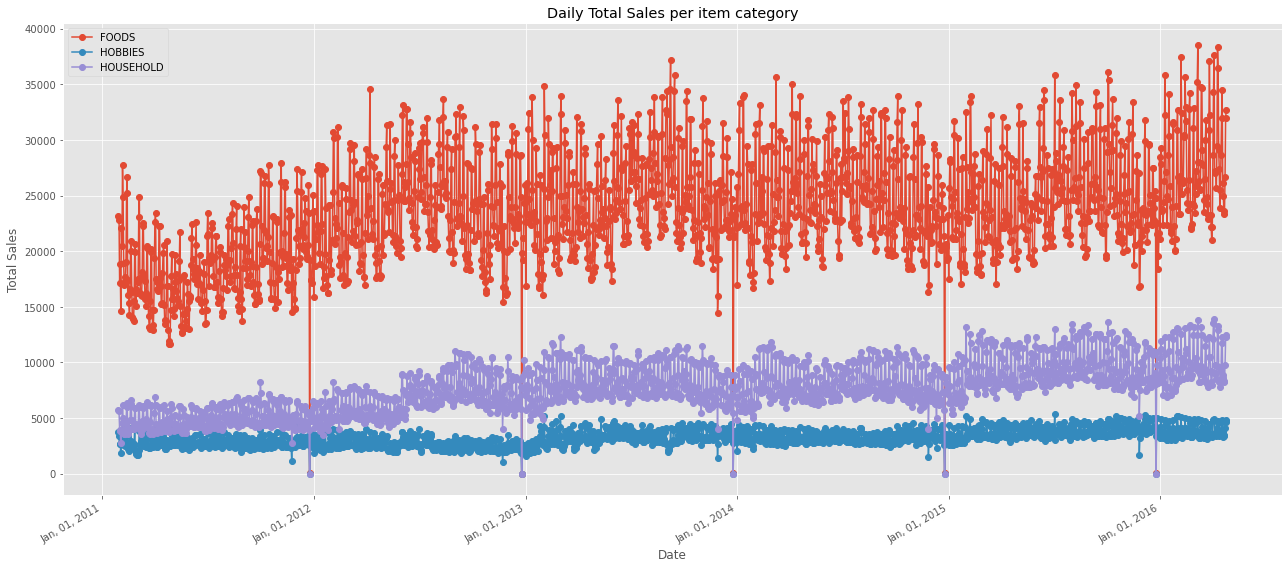

In [27]:
for i in range(len(cat_key)):
    df = df_sales.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
    df.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)
    result = df.merge(df_calendar,on='d',how='left')
    result = result[['date','Total_Sales']]
    result['date'] = pd.to_datetime(result['date'])
    item_dates = result['date']
    item_totalSales = result['Total_Sales']
    plt.plot_date(item_dates,item_totalSales,linestyle='solid',label=cat_key[i])
    plt.gcf().autofmt_xdate()
    date_format = mat_dates.DateFormatter('%b, %d, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().set_size_inches(18, 8)
    
    
plt.title('Daily Total Sales per item category')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Daily total sales of Food category is highest and has trend upwards (sales increasing over the years) 
2.   Daily total sales of Hoobies category are the least and remain almost constant over the years.
3.   Daily total sales of Household category also has trend upwards (sales increasing over the years).






<h3> Weekly seasonality pattern per item category for each state </h3>

In [8]:
#reference: https://stackoverflow.com/questions/62166396/how-to-scale-histogram-y-axis-in-million-in-matplotlib

def lblFormat(n, pos):
    
    return str(int(n / (1e5)))

lblFormatter = FuncFormatter(lblFormat)

In [9]:
percat_state_grp = df_sales.groupby(['cat_id','state_id'])
grp_key = list(percat_state_grp.groups.keys())
grp_idx = list(percat_state_grp.groups.values())

labels = [str(x[0])+'_'+ str(x[1]) for x in grp_key]

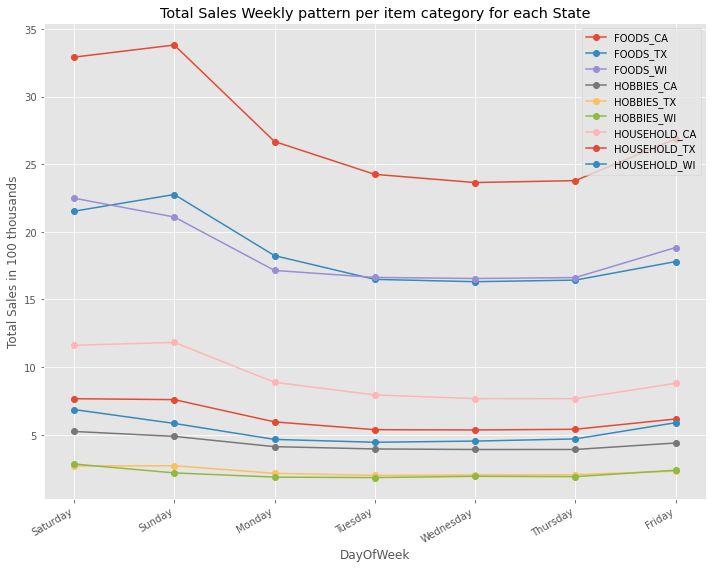

In [10]:

for i in range(len(grp_key)):
    cat_aggregate_df = df_sales.iloc[grp_idx[i]].loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
    cat_aggregate_df.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)
    cat_aggregate_df = cat_aggregate_df.merge(df_calendar,on='d',how='left')
    cat_aggregate_df = cat_aggregate_df[['date','Total_Sales']]
    cat_aggregate_df['date'] = pd.to_datetime(cat_aggregate_df['date'])
    cat_aggregate_df['day_name']=cat_aggregate_df['date'].dt.day_name()
    cat_aggregate_df_gpwd = cat_aggregate_df.groupby('day_name').agg({'Total_Sales':'sum'}).reset_index()

    #reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
    day_name_order = list(cat_aggregate_df['date'].dt.day_name().unique())
    cat_aggregate_df_gpwd.index = pd.CategoricalIndex(cat_aggregate_df_gpwd.day_name, categories=day_name_order, ordered=True)
    cat_aggregate_df_gpwd = cat_aggregate_df_gpwd.sort_index()
    cat_aggregate_df_gpwd.reset_index(drop=True,inplace=True)
    week_days = cat_aggregate_df_gpwd['day_name']
    item_totalSales = cat_aggregate_df_gpwd['Total_Sales']
    plt.plot_date(week_days,item_totalSales,linestyle='solid',label=labels[i]) #    ,color=next(color))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(10, 8)
    plt.gca().yaxis.set_major_formatter(lblFormatter)

    
plt.title('Total Sales Weekly pattern per item category for each State')
plt.legend(loc = 'upper right')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales in '+ str(int(1e2)) + ' thousands')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Sales from all the 3 categories in **Wisconsin** drops on Sunday from Saturday and drops even further on weekdays and increase on Friday.
2.   **California** state sales of Food and Household category has similar pattern i.e., sales increase from Saturday to Sunday and decrease over the course of weekdays and increase on Friday. But the Hobbies sales from **California** state remain constant over all the weekdays.
1.   **Texas** state also has similar weekly seasonality to **California** state. Sales of Food and Household category has similar pattern i.e, sales increase from Saturday to Sunday and decrease over the course of weekdays and increase on Friday. But the Hobbies sales remain constant over all the weekdays.





<h3>Monthly sales pattern per item category for each state </h3>

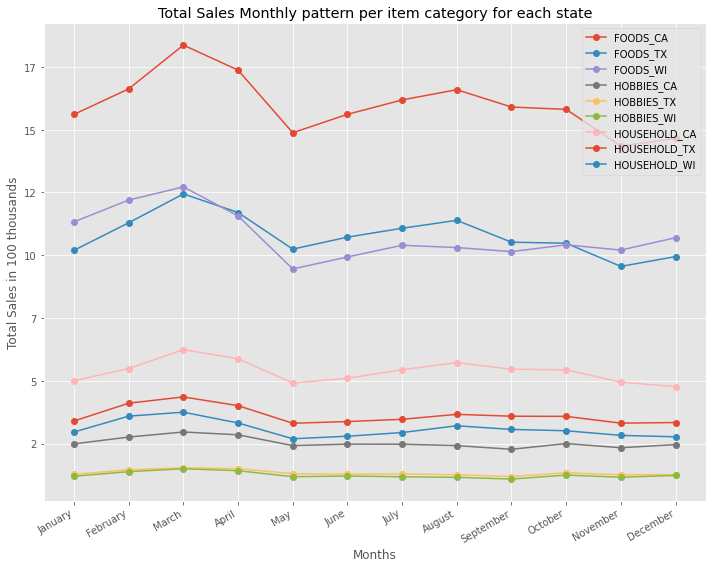

In [13]:

for i in range(len(grp_key)):
    cat_aggregate_df = df_sales.iloc[grp_idx[i]].loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
    cat_aggregate_df.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)
    cat_aggregate_df = cat_aggregate_df.merge(df_calendar,on='d',how='left')
    cat_aggregate_df = cat_aggregate_df[['date','Total_Sales']]
    cat_aggregate_df['date'] = pd.to_datetime(cat_aggregate_df['date'])
    cat_aggregate_df['month']=cat_aggregate_df['date'].dt.month_name()
    cat_aggregate_df_gpm = cat_aggregate_df.groupby('month').agg({'Total_Sales':'sum'}).reset_index()

    #reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
    month_name_order = list(cat_aggregate_df['date'].dt.month_name().unique())
    cat_aggregate_df_gpm.index = pd.CategoricalIndex(cat_aggregate_df_gpm.month, categories=month_name_order, ordered=True)
    cat_aggregate_df_gpm = cat_aggregate_df_gpm.sort_index()
    cat_aggregate_df_gpm.reset_index(drop=True,inplace=True)
    month_names = cat_aggregate_df_gpm['month']
    item_totalSales = cat_aggregate_df_gpm['Total_Sales']
    plt.plot_date(month_names,item_totalSales,linestyle='solid',label=labels[i])#,color=next(color))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(10, 8)
    plt.gca().yaxis.set_major_formatter(lblFormatter)

plt.title('Total Sales Monthly pattern per item category for each state')
plt.legend(loc = 'upper right')
plt.xlabel('Months')
plt.ylabel('Total Sales in '+ str(int(1e2)) + ' thousands')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   Sales from **California** state of all the 3 categories has similar monthly seasonality effect. Highest sales in March and lowest in November. 
2.    Sales from **Texas** state of the 2 categories Foods and Household has similar monthly seasonality effect. Highest sales in March and lowest in November. But the sales of Hobbies category in **Texas** is constant over all the months.
3.   Sales from **Wisconsin** state has similar monthly seasonality effect to **Texas** state for the categories Household and Hobbies.
4.   **Wisconsin** state's November and December months sales of Food category are higher than that of **Texas** state's.










<h3>Daily sales pattern for sample of individual products from different stores</h3>

In [14]:
""" Here we are chosing sample of products and observing their daily sales pattern"""
np.random.seed(28)

#https://stackoverflow.com/questions/15772009/shuffling-permutating-a-dataframe-in-pandas

daily_sales_df = df_sales.reindex(np.random.permutation(df_sales.index)).iloc[:9]
keep_cols = ['id','item_id','dept_id','cat_id','store_id','state_id']

daily_sales_df = pd.melt(daily_sales_df,id_vars=keep_cols,var_name='d',value_name = 'sales')
daily_sales_df = daily_sales_df.merge(df_calendar,on='d',how='left')
daily_sales_df_grp = daily_sales_df.groupby('id')
daily_sales_df_idx = list(daily_sales_df_grp.groups.values())

id_key = list(daily_sales_df_grp.groups.keys())
id_key = [x.replace('_validation','') for x in id_key]

df = daily_sales_df.iloc[daily_sales_df_idx[0]]
df['date'] = pd.to_datetime(df['date'])

s_dates = df['date']

date_format = mat_dates.DateFormatter('%b, %d, %Y')
N = len(id_key)


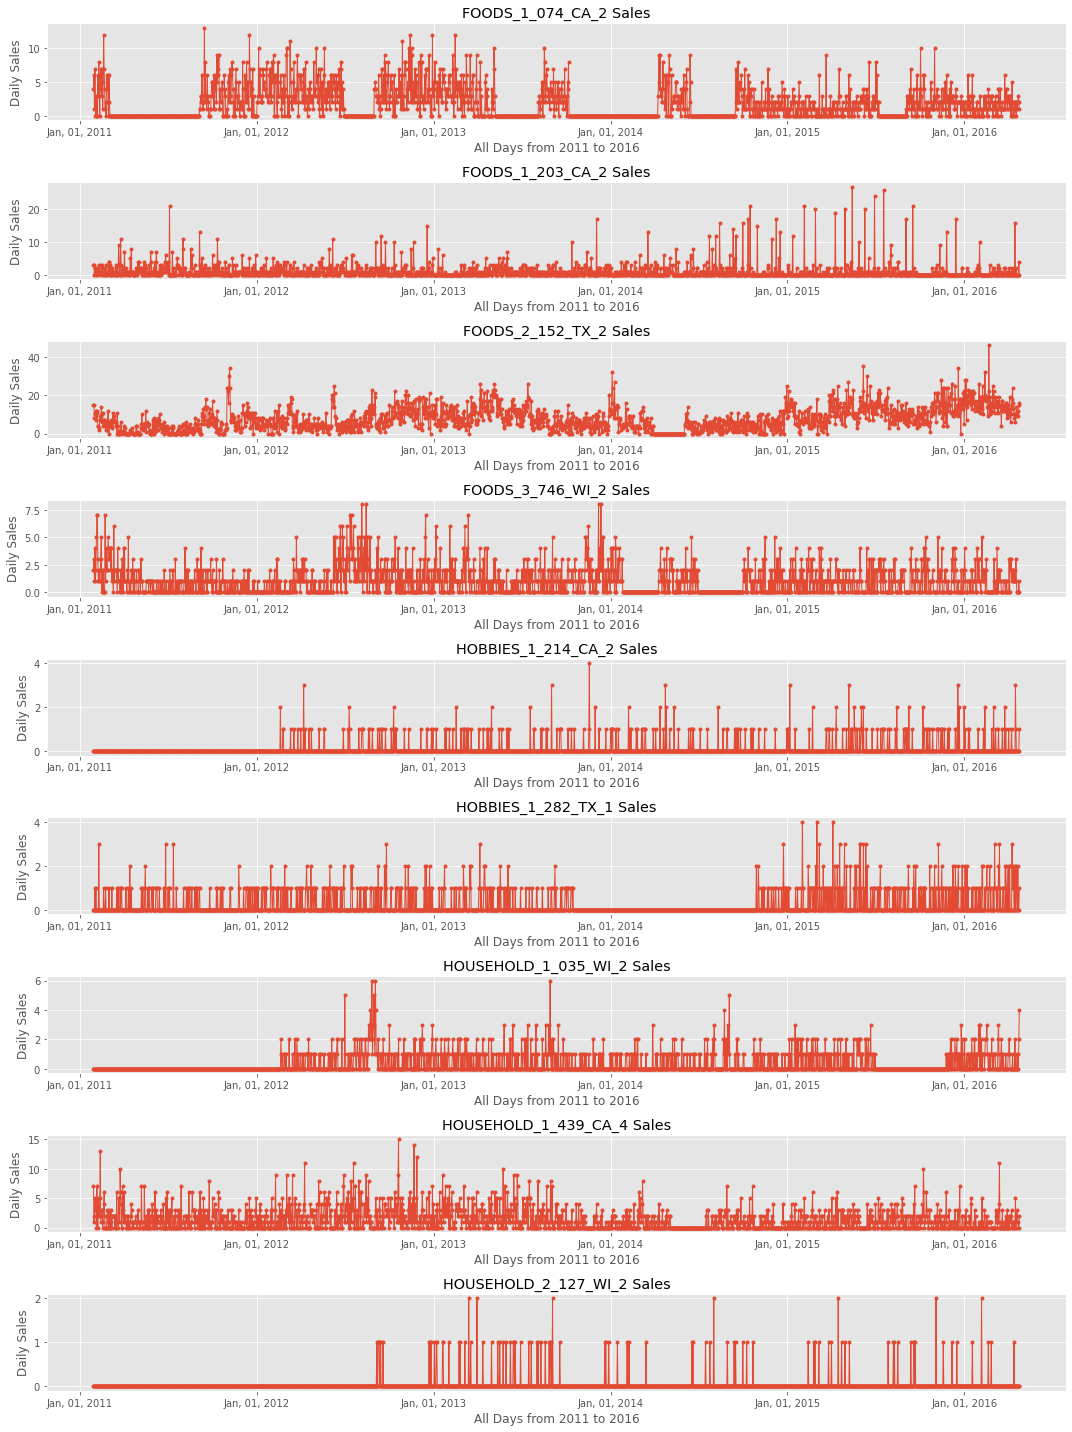

In [15]:
fig = plt.figure(figsize=(15, 20))
for i in range(N):
    ax = fig.add_subplot(N,1,i+1)
    df1 = daily_sales_df.iloc[daily_sales_df_idx[i]]
    plt.plot_date(s_dates,df1['sales'],linestyle='solid',linewidth=1,marker='.')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().set_title(id_key[i]+ ' Sales')
    plt.gca().set_xlabel('All Days from 2011 to 2016')
    plt.gca().set_ylabel('Daily Sales')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   From the above sales pattern for sample of items from different stores we observe that there is no steady pattern in sales.
2.   The sales drop off to zero at irregular intervals.
3.   Sales of Food item are high and even touch above 30 on a given day(FOODS_2_152_TX_2).
4.   Sales of some of the item can be very less as less than 3 daily (as observed from HOBBIES_1_214_CA_2).

<h3>Price distribution for each store</h3>

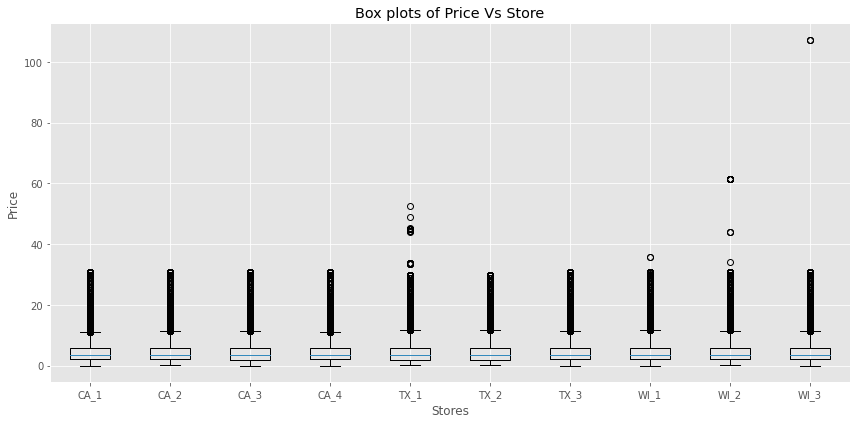

In [17]:
"""Here we get the price of items for each store individually"""
price_grp = df_prices.groupby('store_id')
price_idx = list(price_grp.groups.values())
price_key = list(price_grp.groups.keys())

"""Box plot of price of items per store """
price_value = []
for i in range(len(price_key)):
    price_value.append(df_prices.iloc[price_idx[i]]['sell_price'].values)

plt.figure(figsize=(12,6))
plt.boxplot ([i for i in price_value],labels=price_key)
plt.title('Box plots of Price Vs Store')
plt.xlabel('Stores')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   The distribution of prices for all the stores is same as there is overlap of median price of all the stores.
2.   The 50th percentile price of all the stores is less than 2.5 (USD) and and 75th percentile is less than 5 (USD).  There are lot of outlier prices for all the stores and WI_3 store has outliers where price > 100 (USD).



<h3>Percentage of items with missing prices per store for each state</h3>

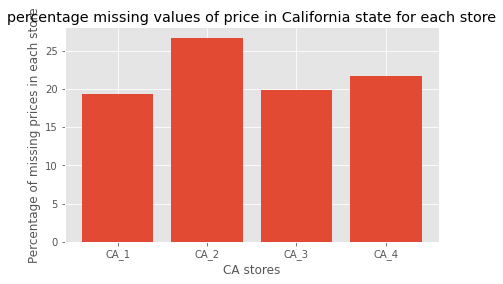

***********************************************************************************************************


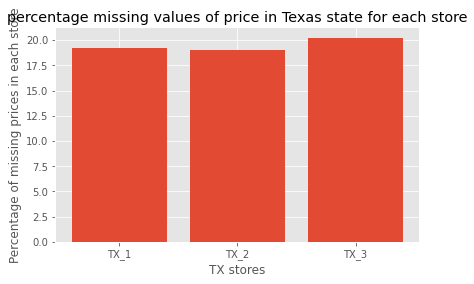

***********************************************************************************************************


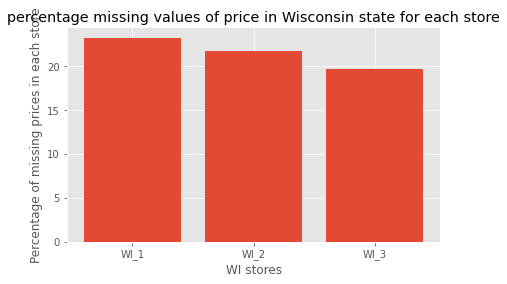

In [19]:
CA_stores = []
CA_missing_prices = []
CA_sales = df_sales.loc[df_sales['state_id']=='CA']
CA_sales = pd.melt(CA_sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sales')
CA_sales = CA_sales.merge(df_calendar,on='d',how='left')
CA_sales = CA_sales.merge(df_prices,how='left',on=['store_id','item_id','wm_yr_wk'])
CA_sales_grp = CA_sales.groupby('store_id')

for key,value in CA_sales_grp.groups.items():
    CA_stores.append(key)
    CA_missing_prices.append(CA_sales.iloc[value]['sell_price'].isnull().sum()*100/len(CA_sales.iloc[value]))

plt.bar(CA_stores,CA_missing_prices)
plt.title('percentage missing values of price in California state for each store')
plt.xlabel('CA stores')
plt.ylabel('Percentage of missing prices in each store')
plt.tight_layout()
plt.show()

print("***********************************************************************************************************")

TX_stores = []
TX_missing_prices = []
TX_sales = df_sales.loc[df_sales['state_id']=='TX']
TX_sales = pd.melt(TX_sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sales')
TX_sales = TX_sales.merge(df_calendar,on='d',how='left')
TX_sales = TX_sales.merge(df_prices,how='left',on=['store_id',	'item_id',	'wm_yr_wk'])
TX_sales_grp = TX_sales.groupby('store_id')

for key,value in TX_sales_grp.groups.items():
    TX_stores.append(key)
    TX_missing_prices.append(TX_sales.iloc[value]['sell_price'].isnull().sum()*100/len(TX_sales.iloc[value]))

plt.bar(TX_stores,TX_missing_prices)
plt.title('percentage missing values of price in Texas state for each store')
plt.xlabel('TX stores')
plt.ylabel('Percentage of missing prices in each store')
plt.tight_layout()
plt.show()

print("***********************************************************************************************************")

WI_stores = []
WI_missing_prices = []
WI_sales = df_sales.loc[df_sales['state_id']=='WI']
WI_sales = pd.melt(WI_sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sales')
WI_sales = WI_sales.merge(df_calendar,on='d',how='left')
WI_sales = WI_sales.merge(df_prices,how='left',on=['store_id',	'item_id',	'wm_yr_wk'])
WI_sales_grp = WI_sales.groupby('store_id')

for key,value in WI_sales_grp.groups.items():
    WI_stores.append(key)
    WI_missing_prices.append(WI_sales.iloc[value]['sell_price'].isnull().sum()*100/len(WI_sales.iloc[value]))

plt.bar(WI_stores,WI_missing_prices)
plt.title('percentage missing values of price in Wisconsin state for each store')
plt.xlabel('WI stores')
plt.ylabel('Percentage of missing prices in each store')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1.   CA_2 store's items price missing is higher.
2.   In all the store greater than 17% of their items price is missing.
3.   TX_1 and TX_2 stores has eaual percentage of missing price of items.





<h3>Impact of events on sales </h3>

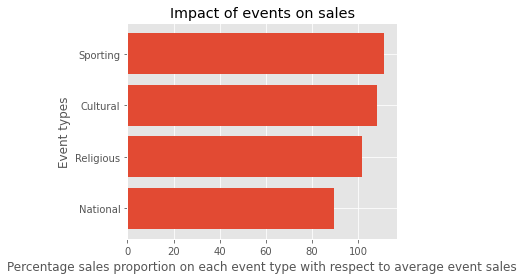

In [20]:
""" Here we get the percentage sales proportion on each event type with respect to average sales on event days """

df_calendar_sliced = df_calendar[(df_calendar['date'] >= '2014-01-01') & (df_calendar['date'] <= '2016-04-24')]
df_result = pd.melt(df_sales, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                var_name='d',value_name='sales')
df_result = df_result.merge(df_calendar_sliced,on='d',how='right')

df_event = df_result.loc[df_result[['event_name_1']].notnull().any(axis=1)]
df_non_event = df_result.loc[df_result[['event_name_1']].isnull().all(axis=1)]

events_list = []
event_sales = []
count = 0
temp = 0
events_grp = df_event.groupby('event_type_1')
for key,val in events_grp.groups.items():
    events_list.append(key)
    temp = len(df_calendar_sliced[df_calendar_sliced['event_type_1'] == key])
    count += temp
    event_sales.append(df_event.loc[val]['sales'].sum()/(temp))

total_event_sales = (df_event['sales'].sum())/(count)
event_sales = [round((x/total_event_sales)*100,2) for x in event_sales]
events_list = np.asarray(events_list)[np.argsort(np.asarray(event_sales))]
event_sales = np.asarray(event_sales)[np.argsort(np.asarray(event_sales))]
plt.figure(figsize=(5,4))
plt.barh(events_list,event_sales)
plt.title('Impact of events on sales')
plt.xlabel('Percentage sales proportion on each event type with respect to average event sales')
plt.ylabel('Event types')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1. On sporting events sales increase and on National events sales decrease.

2. Increase in sales is high on sporting event days and second highest for cultural event days and religious event days the sales remain consistent(i.e., no increase or decrease w.r.t average event days sales).

3. Sales on sporting events are 110% to the average sales on event days i.e., there is increase in 10% to the average sales on event days.

4. Sales on cultural events are 108% to the average sales on event days i.e., there is increase in 8% to the average sales on event days.

5. Sales on national events are 89% to the average sales on event days i.e., there is decrease in 11% to the average sales on event days.

#### Average sales on event days Vs non-event days

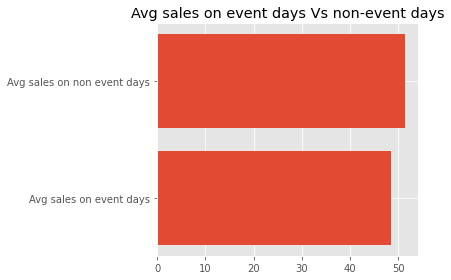

In [45]:

""" Here we get the average sales proportion on event days and non-event days """

non_event_sales = int(df_non_event['sales'].sum())

days_noneve = len(df_calendar_sliced) - df_calendar_sliced['event_type_1'].count()
days_eve = df_calendar_sliced['event_type_1'].count()


total_noneve_sales = non_event_sales/days_noneve

total_sales = avg_noneve_sales + total_event_sales

total_noneve_sales = round((total_noneve_sales/total_sales)*100,2)
total_event_sales = round((total_event_sales/total_sales)*100,2)

plt.barh(['Avg sales on event days','Avg sales on non event days'],[total_event_sales,avg_noneve_sales])
plt.title('Avg sales on event days Vs non-event days')
plt.tight_layout()
plt.show()

<h4>observations</h4>

1. Sales are higher on non-event days compared to event days.

2. On a whole the sales decrease with event days (people shop less on holidays) but not by much amount.

<h3>Top products which highest sales</h3>

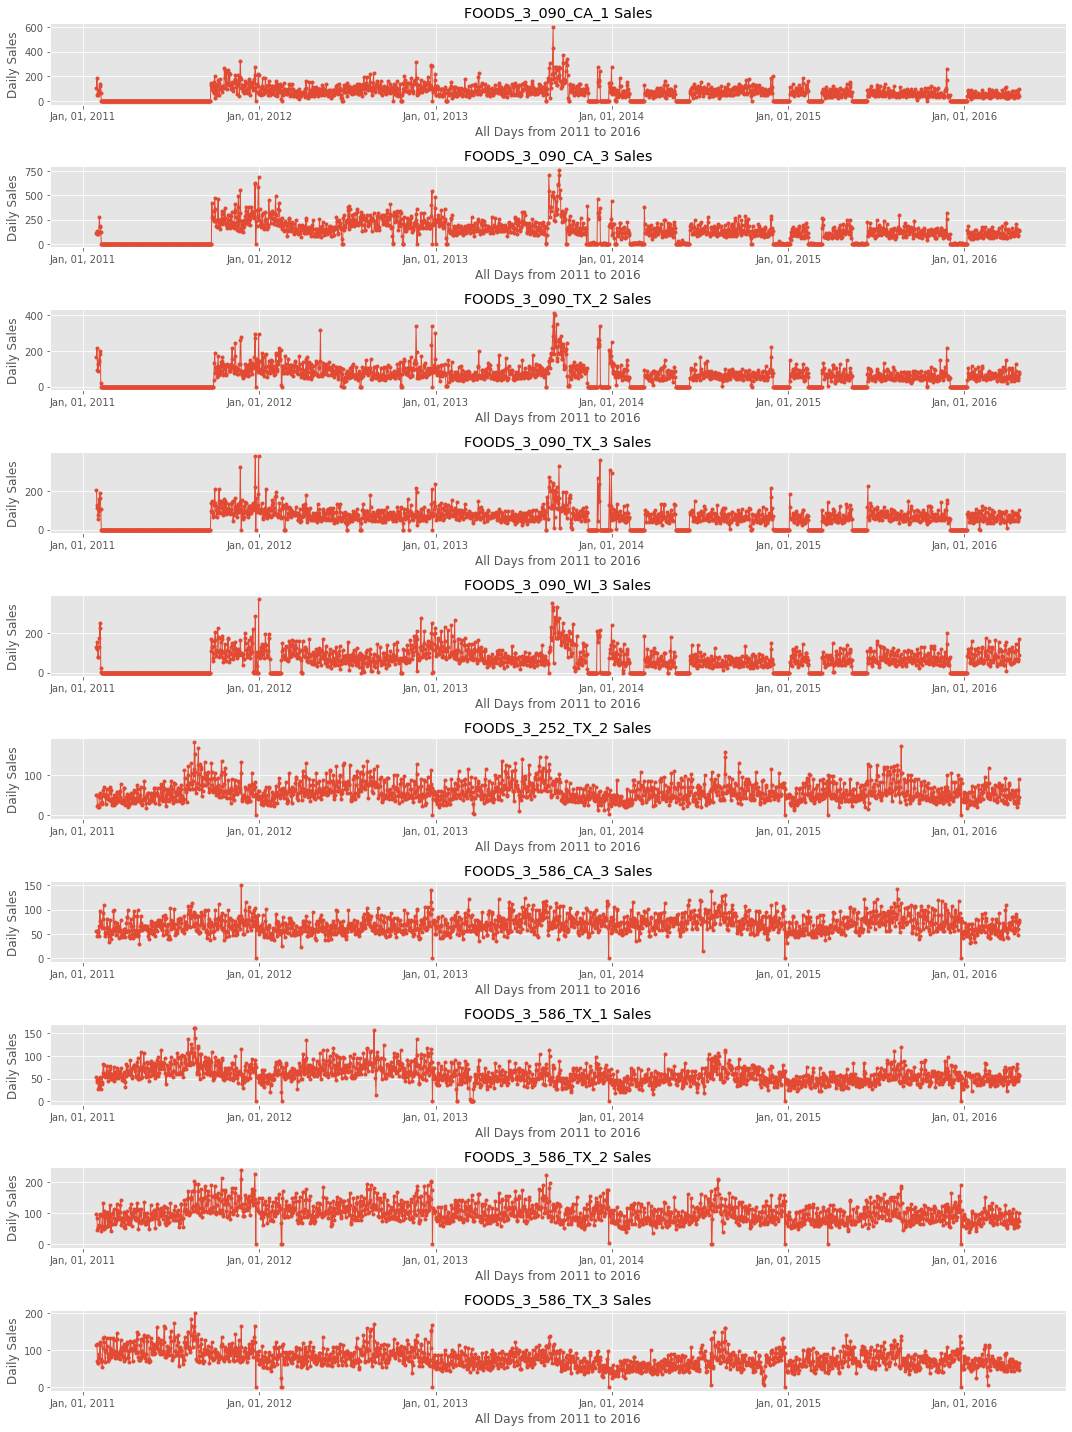

In [48]:
""" Here we get top 10 products with highest sales and plot the sales of these products """

top_product_sales = df_sales.loc[:,'d_1':'d_1913'].sum(axis=1).sort_values(ascending=False).iloc[:10]
top_product_sales_idx = list(top_product_sales.index)
top_product_sales_df = df_sales.loc[top_product_sales_idx]
top_product_sales_df = pd.melt(top_product_sales_df, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                         var_name='d',value_name='sales')
top_product_sales_df = top_product_sales_df.merge(df_calendar,on='d',how='left')
top_product_sales_df_grp = top_product_sales_df.groupby('id')
top_product_sales_df_idx = list(top_product_sales_df_grp.groups.values())
top_prod = list(top_product_sales_df_grp.groups.keys())
top_prod = [x.replace('_validation','') for x in top_prod]

df = top_product_sales_df.iloc[top_product_sales_df_idx[0]]
df['date'] = pd.to_datetime(df['date'])
top_dates = df['date']
date_format = mat_dates.DateFormatter('%b, %d, %Y')
N = len(top_prod)


"""Daily sales pattern of top sales products"""
fig = plt.figure(figsize=(15, 20))
for i in range(N):
    ax = fig.add_subplot(N,1,i+1)
    df1 = top_product_sales_df.iloc[top_product_sales_df_idx[i]]
    ax.plot_date(top_dates,df1['sales'],linestyle='solid',linewidth=1,marker='.')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_title(top_prod[i]+ ' Sales')
    ax.set_xlabel('All Days from 2011 to 2016')
    ax.set_ylabel('Daily Sales')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1. We observe that the top 10 products with highest number of sales is Food products(since Food products are essential).

2. First highest sales is for product 'FOODS_3_090_CA_3' product belonging to 'CA_3' store from 'California' state, Second highest sales is for product 'FOODS_3_586_TX_2' product belonging to 'TX_2' store from 'Texas' state, Third highest sales is for product 'FOODS_3_586_TX_3' product belonging to 'TX_3' store from 'Texas' state.

3. Wisconsin states 'FOODS_3_090_WI_3' product belonging to 'WI_3' store is with sixth highest sales.

3. Interestingly even though california has higher Walmart's sales proportion, but there are 6 products with highest sales from Texas state in top 10.

<h3>Sales trend from start Vs end over a month period </h3>

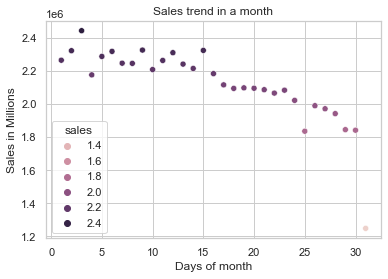

In [7]:
plt.style.use('ggplot')

""" Merge sales, calender dataframes """
df_sales_trend = pd.melt(df_sales, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                         var_name='d',value_name='sales')
df_sales_trend = df_sales_trend.merge(df_calendar,on='d',how='left')
df_sales_trend['date'] = pd.to_datetime(df_sales_trend['date'])


""" Here we the sales on each day of the month """
df_sales_trend['day_of_month'] = df_sales_trend['date'].dt.day
df_month = df_sales_trend.groupby('day_of_month').agg({'sales':'sum'}).reset_index()
sns.set(style="whitegrid")

sns.scatterplot(data=df_month, x="day_of_month", y="sales", hue="sales")

plt.title('Sales trend in a month')
plt.xlabel('Days of month')
plt.ylabel('Sales in Millions')
plt.show()

<h4>Observations</h4>

1. Clearly we observe that sales are high in starting of the month and remain consistent for first 15 days of the month.

2. After 15 days of a month the sales decrease gradually and become 75% to the sales over the start of the month.

<h3>Sales over weekend Vs weekdays in each months of 2016</h3>

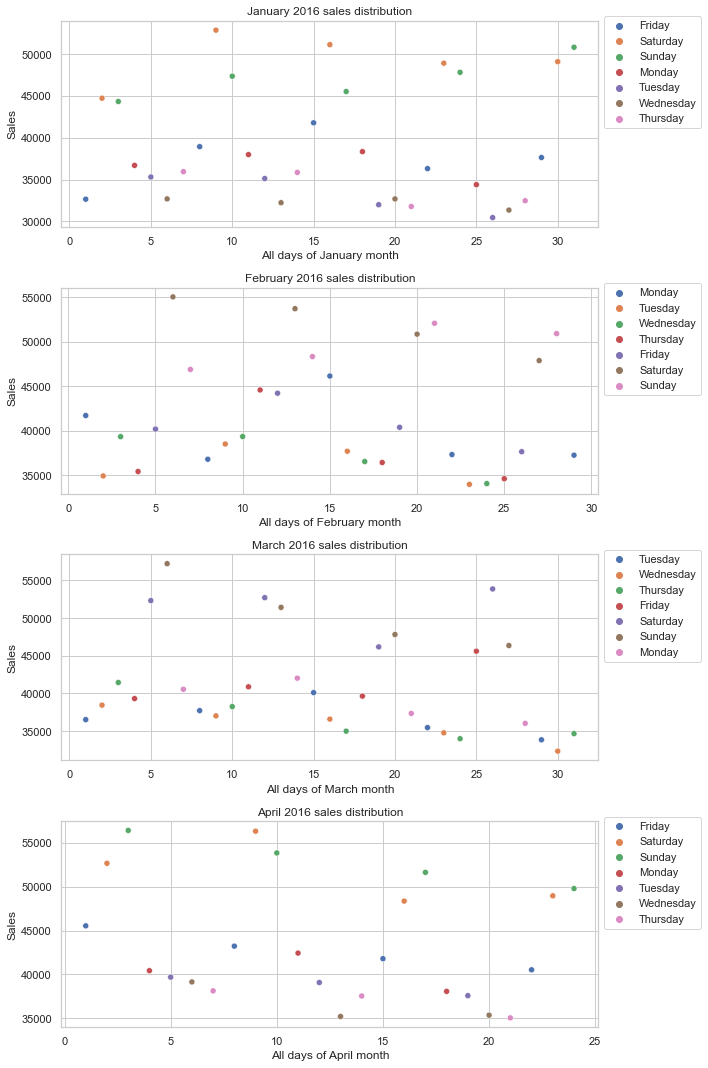

In [9]:

""" Here we the sales distribution of each day for all the months of 2016 
   and observe sales over weekend Vs weekdays in each of the months """
df = df_sales_trend[df_sales_trend['year'] == 2016]

grp = df.groupby('month')
months = list(grp.groups.keys())
idx = list(grp.groups.values())

months_dict = {}
months_lst = ['January','February','March','April']
for i in range(len(months)):
    months_dict[months[i]] =  months_lst[i]
    
f, axes = plt.subplots(4, 1,figsize=(10,15))
sns.set(style="whitegrid")
for i in range(len(months)):
    df_wd = df.loc[idx[i]][['weekday','day_of_month','sales']]
    df_wdsales = df_wd.groupby('day_of_month').agg({'sales':'sum', 'weekday':'first'}).reset_index()
    s = sns.scatterplot(data=df_wdsales, x="day_of_month", y="sales", hue="weekday",ax=axes[i])
    s.legend(loc='center left', bbox_to_anchor=(1, 0.75), ncol=1)
    axes[i].set_title(months_dict[months[i]] + ' 2016 sales distribution')
    axes[i].set_xlabel('All days of '+months_dict[months[i]]+' month')
    axes[i].set_ylabel('Sales')
plt.tight_layout()
plt.show()

<h4>Observations</h4>

1. Sales are higher in starting days of each month.

2. Weekend sales are high in both the starting of the month and ending of the month.

3. There is decrease in weekday sales towards the end of month.

4. But the sales over weekends are consistent (high in both the starting and ending of the months).

5. From this we can say that sales are impacted by weekends and weekdays.

<h2>Takeaways from EDA</h2>

1. Performed analysis on the sales pattern of Walmart across states and stores for all the days starting from Jan 29th 2011 till April 24th 2016 and observed that there is increase in sales pattern over the years i.e., upward trend. Also we observe the sales on very first day of the year is zero (due to the stores are closed on New year day).
2. Performing analysis of sales year wise,, observed that there is yearly seasonality and the time series each year is a stationary time series.
3. Overall monthly sales see highest in March and lowest in November.
4. Overall week sales see highest in weekends compared to weekdays(Monday to Thursday) and Friday sales are slightly higher compared to other weekdays.
5. California state has highest sales and also highest revenue generated. Whereas Texas and Wisconsin sales and revenue generated are almost equal.
6. Food category aacounts for 70% sales but generated only 58% revenue.
7. SNAP day sales are slightly higher compared to non-SNAP day sales in all three states.
8. Overall sales pattern of each category is similar and Food products as they are more in number the overall sales and revenue generated is higher.
9. There is a lot of non-periodic daily sales pattern of each of the products.
10. Sporting and cultural events see increase in sales and national holidays see reduce in sales.
11. Sales are high in starting of the month and decrease gradullay towards the end of the month.
12. Snap days see increase in sales atleast 4% and highest being 30%.
13. Over the course of years the revenue generated increases.
14. California and Texas states see highest sales on Sunday's but Wisconsin state has highest sales on Saturday's. 
15. Top highest daily sales are for Food products and are from California and Texas states.